In [1]:
from IPython import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
column_names = ['Hours', 'Grades']
students = pd.read_csv('https://raw.githubusercontent.com/philippbauch/simple-linear-regression-notebook/master/data.csv', header=None, names=column_names)

# Shape of dataset
students.shape

# Info
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   100 non-null    float64
 1   Grades  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [3]:
students.head()

,Hours,Grades
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


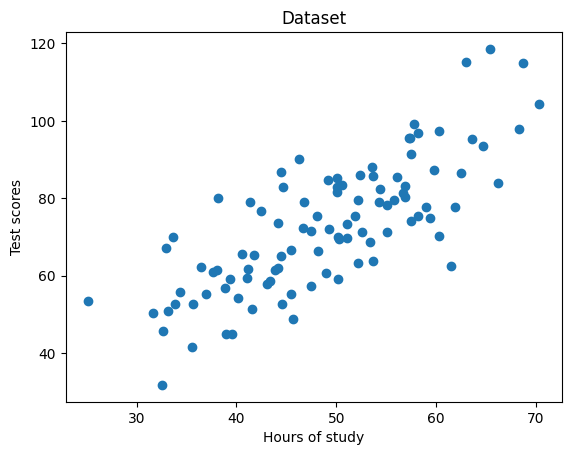

In [4]:
X = students[['Hours']]
y = students[['Grades']]

#Plot the dataset
plt.scatter(X,y)
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Dataset')
plt.show()

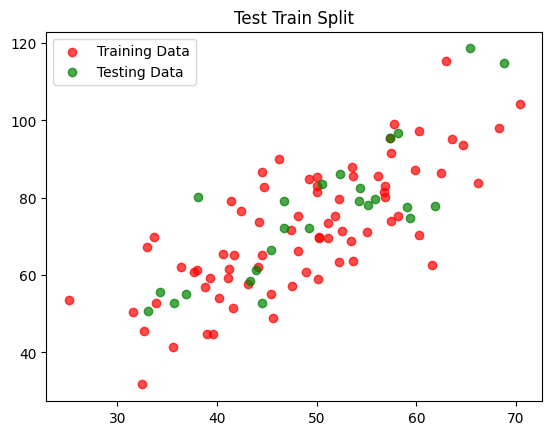

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

# Test train split visualization
plt.scatter(X_train,y_train, label='Training Data', color='r', alpha=0.7)
plt.scatter(X_test,y_test, label='Testing Data', color='g', alpha=0.7)
plt.legend()
plt.title('Test Train Split')
plt.show()

In [6]:
# Create linear regression object
LR = linear_model.LinearRegression()

# Train the model using the training sets
LR.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Make predictions using the testing set
predicted = LR.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predicted))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, predicted))

Mean squared error: 105.91
Coefficient of determination: 0.65


Coefficients: 
 [[1.25206583]]
Intercept: 
 [10.76432426]


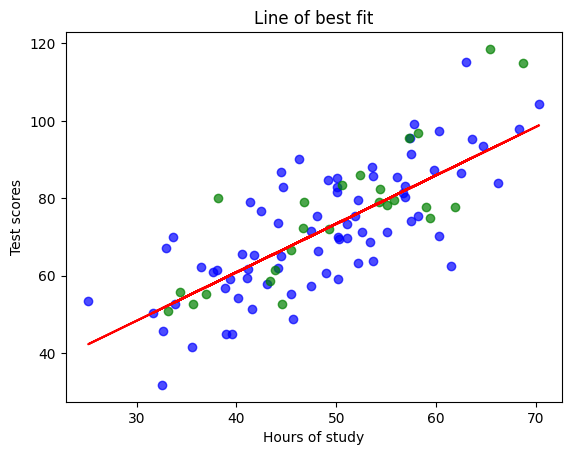

In [8]:
# The coefficients
print("Coefficients: \n", LR.coef_)
# The intercept
print("Intercept: \n", LR.intercept_)

# Visualizing the regression line
plt.scatter(X_train,y_train, label='Training Data', color='b', alpha=0.7)
plt.scatter(X_test,y_test, label='Testing Data', color='g', alpha=0.7)
plt.plot(X_train, LR.coef_*X_train + LR.intercept_, label='Linear Regression' , color='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
auto_dataset = raw_dataset.dropna()

In [10]:
# Create polynomial regression object
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

# Train the model using the training sets
X_poly = polynomial_features.fit_transform(X_train)

# Create and fit the linear regression model
PL = linear_model.LinearRegression()
PL.fit(X_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Mean squared error: 91.16
Coefficient of determination: 0.76
Coefficients:
 [[0.         0.85934867 0.01246335]]
Intercept:
 [9.3819662]


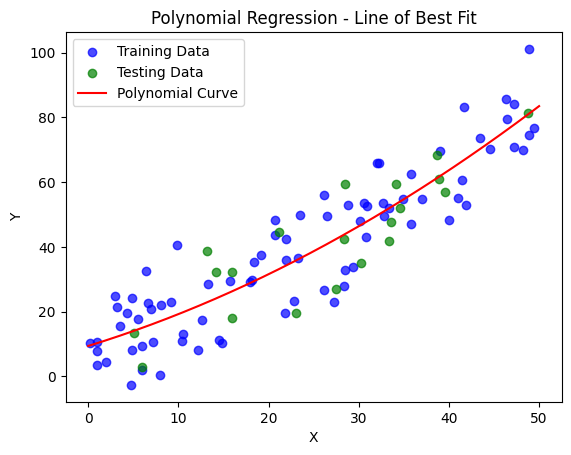

In [11]:
# Polynomial Regression Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Example data (you can replace with your dataset)
np.random.seed(0)
X = np.random.rand(100, 1) * 50
y = 0.5 * X + 0.02 * (X ** 2) + 10 + np.random.randn(100, 1) * 10

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)

# Train the model
PL = LinearRegression()
PL.fit(X_train_poly, y_train)

# Predict
X_test_poly = polynomial_features.transform(X_test)
y_pred = PL.predict(X_test_poly)

# Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
print("Coefficients:\n", PL.coef_)
print("Intercept:\n", PL.intercept_)

# Visualization
plt.scatter(X_train, y_train, label='Training Data', color='b', alpha=0.7)
plt.scatter(X_test, y_test, label='Testing Data', color='g', alpha=0.7)

X_curve = np.linspace(0, 50, 200).reshape(-1, 1)
X_curve_poly = polynomial_features.transform(X_curve)
y_curve = PL.predict(X_curve_poly)

plt.plot(X_curve, y_curve, color='red', label='Polynomial Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression - Line of Best Fit')
plt.legend()
plt.show()


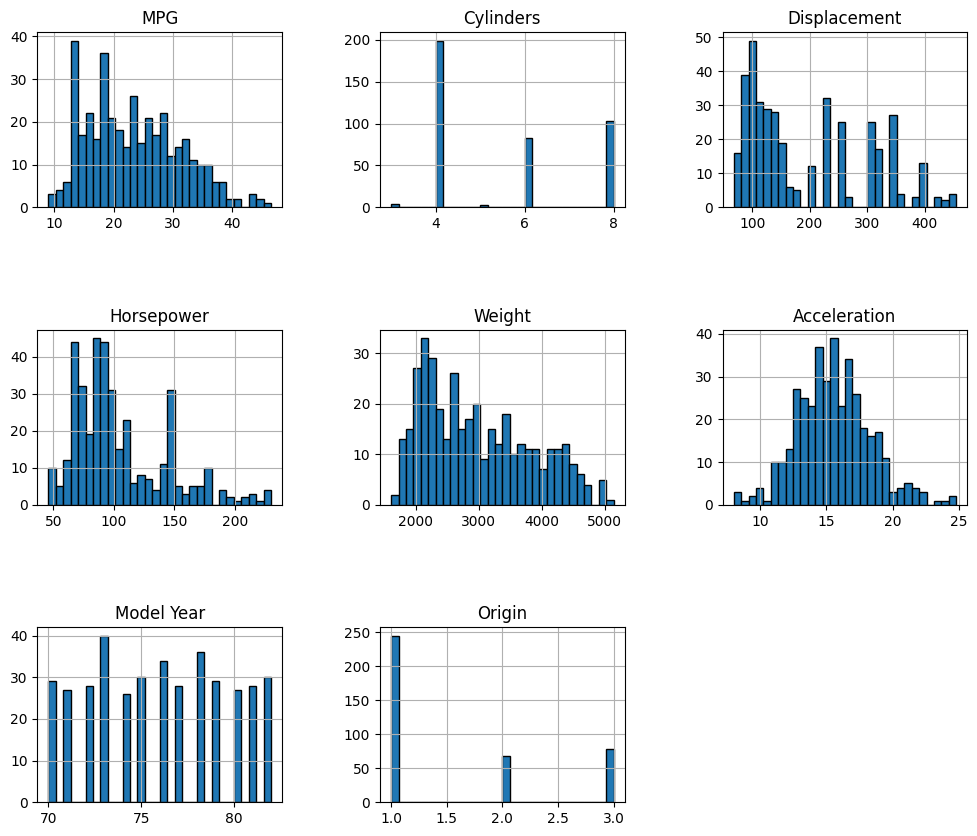

In [12]:
auto_dataset.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

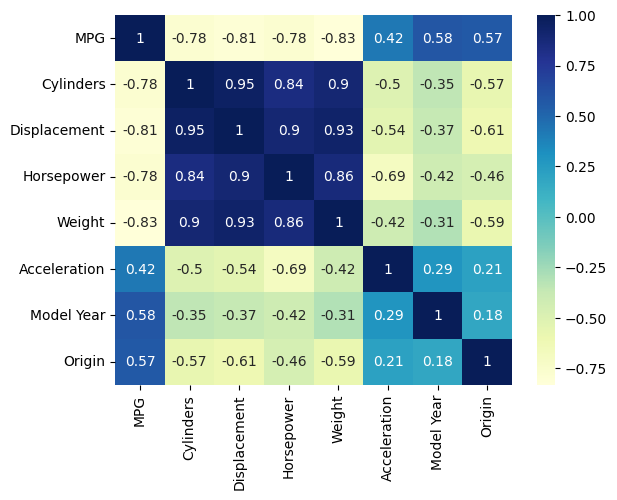

In [13]:
import seaborn as sns
sns.heatmap(auto_dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [14]:
y = auto_dataset[['Horsepower']]
X = auto_dataset.drop('Horsepower', axis=1)